In [51]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = 'ProjPowSpec.h5'
df = h5py.File(filename, 'r')

hdf2 = 'CovarianceMatrix.h5'
Cov = h5py.File(hdf2, 'r')

#print(Cov['CovMat'])
#print(Cov['Inverse'])

#print(df['delta2'][:,:,1])


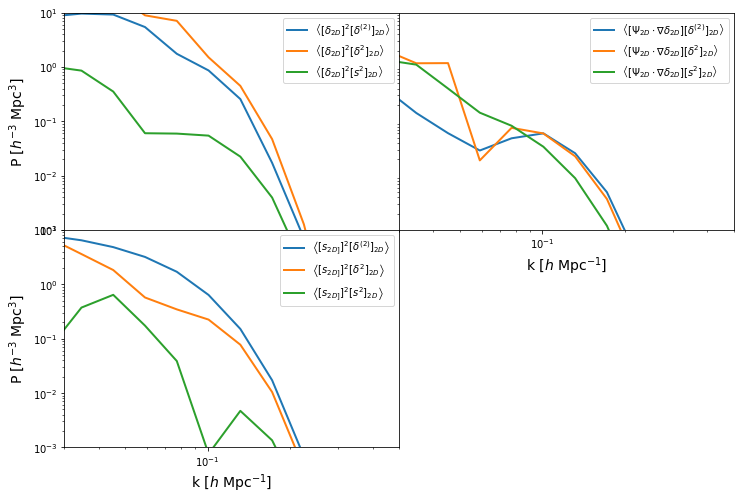

In [124]:

kTab = np.array(df['delta2'][0,:,0])


delta2 = np.array(df['delta2'][:,:,1])
tidal = np.array(df['shift'][:,:,1])
shift = np.array(df['tidal'][:,:,1])

def plot_projectedPS(delta2, shift, tidal):
    axis = [0.03,0.5,1e-3,1e1]
    fig = plt.figure(figsize=(12,8))

    ax=plt.subplot(221)
    leg = [r"$\left\langle [\delta_{2D}]^2[\delta^{(2)}]_{2D} \right\rangle$",
           r"$\left\langle [\delta_{2D}]^2[\delta^{2}]_{2D} \right\rangle$",
           r"$\left\langle [\delta_{2D}]^2[s^2]_{2D} \right\rangle$"]


    for i in range(0,3):
        plt.plot(kTab, abs(delta2[i]), lw=2.0, label=leg[i])

    plt.legend(loc='upper right',frameon=True)
   
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'P [$h^{-3}$ Mpc$^{3}$]', fontsize=14)
    plt.axis(axis)
    plt.locator_params(numticks=4)
    ax.set_xticks([0])
    ax.set_xticklabels([]) # remove the y-axis ticks

    ax=plt.subplot(222)
    leg2 = [r"$\left\langle [\Psi_{2D}\cdot\nabla\delta_{2D}][\delta^{(2)}]_{2D} \right\rangle$",
           r"$\left\langle [\Psi_{2D}\cdot\nabla\delta_{2D}][\delta^{2}]_{2D} \right\rangle$",
           r"$\left\langle [\Psi_{2D}\cdot\nabla\delta_{2D}][s^2]_{2D} \right\rangle$"]

    for i in range(0,3):
        plt.plot(kTab, abs(shift[i]), lw=2.0, label=leg2[i])

    plt.legend(loc='upper right',frameon=True)    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'k [$h$ Mpc$^{-1}$]', fontsize=14)
    plt.axis(axis)
    ax.set_yticks([0])
    ax.set_yticklabels([]) # remove the y-axis ticks


    ax=plt.subplot(223)
    leg2 = [r"$\left\langle [s_{2D]}]^2[\delta^{(2)}]_{2D} \right\rangle$",
           r"$\left\langle [s_{2D]}]^2[\delta^{2}]_{2D} \right\rangle$",
           r"$\left\langle [s_{2D]}]^2[s^2]_{2D} \right\rangle$"]

    for i in range(0,3):
        plt.plot(kTab, abs(tidal[i]), lw=2.0, label=leg2[i])

    plt.legend(loc='upper right',frameon=True)    
    plt.xscale('log')
    plt.yscale('log')
    plt.axis(axis)
    plt.xlabel(r'k [$h$ Mpc$^{-1}$]', fontsize=14)
    plt.ylabel(r'P [$h^{-3}$ Mpc$^{3}$]', fontsize=14)
    
    plt.locator_params(numticks=4)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
   
    
plot_projectedPS(delta2, shift, tidal)